In [24]:
#Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import math
import seaborn as sns
import plotly.graph_objects as go
import pandas_profiling
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz
import pydotplus
from sklearn import tree
import plotly.offline as py#visualization
import datetime
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
import xgboost
import sidetable
from pygam import LogisticGAM, s, f
from pygam.datasets import default

In [2]:
#https://github.com/carranco-sga/Mexico-COVID-19/blob/master/SINAVE_CDMX/2020/10/20201025.zip
data_mexico = pd.read_csv(r"C:\Users\Guillermo\Documents\TFM\TFM\Datos\Mexico\20201115\CDMX_SINAVE.csv",encoding = 'ANSI')


In [3]:
data_mexico.shape

(656782, 91)

In [4]:
#TRATAMIENTO Y ESTANDARIZACIÓN DE LOS DATOS

data_mexico = data_mexico[data_mexico["resultado_definitivo"] == "SARS-CoV-2"]

data_mexico['pediatrico_adulto'] = np.where(data_mexico['edad'] <= 15,
                                            "NIÑO", "ADULTO")

data_mexico['unidad_cuidados_intensivos'] = data_mexico['unidad_cuidados_intensivos'].fillna("NO")


data_mexico = data_mexico.replace(['NO'],0)
data_mexico = data_mexico.replace(['SI'],1)
data_mexico = data_mexico.replace(['SE IGNORA'],0)
data_mexico['tipo_paciente'] = data_mexico['tipo_paciente'].replace(['AMBULATORIO'],0)
data_mexico['tipo_paciente'] = data_mexico['tipo_paciente'].replace(['HOSPITALIZADO'],1)
data_mexico['sexo'] = data_mexico['sexo'].replace(['FEMENINO'],0)
data_mexico['sexo'] = data_mexico['sexo'].replace(['MASCULINO'],1)


data_mexico.unidad_cuidados_intensivos = data_mexico.unidad_cuidados_intensivos.fillna(0)

In [6]:
data_mexico.head()


,origen,sector,cve_entidad_unidad_medica,entidad_unidad_medica,delegacion_unidad_medica,unidad_medica,fecha_de_registro,sexo,entidad_residencia,cve_entidad_residencia,...,antipireticos,unidad_cuidados_intensivos,linaje_influenza_tipo_b,viaje_1,viaje_2,viaje_3,viaje_4,viaje_5,rango_de_edad,pediatrico_adulto
2,USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. DAVID FRAGOSO LIZALDE,2020-07-24,0,CIUDAD DE MEXICO,9,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,31-40,ADULTO
3,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UNIDAD MOVIL TEMPORAL COVID,2020-06-20,1,CIUDAD DE MEXICO,9,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,51-60,ADULTO
5,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III MEXICO-ESPAÃ‘A,2020-10-22,1,CIUDAD DE MEXICO,9,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,41-50,ADULTO
6,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,EDIFICIO DE LA JURISDICCION SANITARIA,2020-06-11,1,CIUDAD DE MEXICO,9,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,51-60,ADULTO
11,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III MEXICO-ESPAÃ‘A,2020-10-16,0,CIUDAD DE MEXICO,9,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,31-40,ADULTO


In [7]:
data_mexico.stb.freq(["pediatrico_adulto","tipo_paciente","unidad_cuidados_intensivos"],style=True, cum_cols=False)

#print(data_mexico.stb.freq(["pediatrico_adulto","tipo_paciente","unidad_cuidados_intensivos"], cum_cols=False).to_latex())



,pediatrico_adulto,tipo_paciente,unidad_cuidados_intensivos,count,percent
0,ADULTO,0,0,"160,871",79.74%
1,ADULTO,1,0,"30,805",15.27%
2,NIÑO,0,0,"6,695",3.32%
3,ADULTO,1,1,"2,858",1.42%
4,NIÑO,1,0,394,0.20%
5,NIÑO,1,1,114,0.06%


In [8]:
data_mexico_ped = data_mexico[data_mexico["pediatrico_adulto"] == 'NIÑO']

In [9]:
data_mexico_ped.head()

,origen,sector,cve_entidad_unidad_medica,entidad_unidad_medica,delegacion_unidad_medica,unidad_medica,fecha_de_registro,sexo,entidad_residencia,cve_entidad_residencia,...,antipireticos,unidad_cuidados_intensivos,linaje_influenza_tipo_b,viaje_1,viaje_2,viaje_3,viaje_4,viaje_5,rango_de_edad,pediatrico_adulto
19,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III PORTALES,2020-10-29,0,CIUDAD DE MEXICO,9,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,06-15,NIÑO
36,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. MANUEL CARDENAS DE LA VEGA,2020-09-17,0,MEXICO,15,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,06-15,NIÑO
126,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III OASIS,2020-07-08,1,CIUDAD DE MEXICO,9,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,06-15,NIÑO
251,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III MINAS DE CRISTO,2020-10-19,0,CIUDAD DE MEXICO,9,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,06-15,NIÑO
350,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-I PEDREGAL DE SAN NICOLAS NORTE,2020-10-27,1,CIUDAD DE MEXICO,9,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0-05,NIÑO


In [16]:
data_mexico_ped.to_excel(r"C:\Users\Guillermo\Documents\TFM\TFM\Datos\Mexico\20201115\data_set_ped.xlsx")


In [10]:
data_mexico_ped.shape

(7203, 92)

In [11]:
data_mexico_ped_tabla = data_mexico_ped[["tipo_paciente","sexo","edad",
"diabetes","epoc","asma","inmunosupresivo",
"hipertension","otra_condicion",
"enfermedad_cardiaca","obesidad",
"insuficiencia_renal_cronica"]]

data_mexico_ped_tabla = data_mexico_ped_tabla.rename(columns={"tipo_paciente": "Hospitalization",
                                                             "sexo": "Gender",
                                                            "insuficiencia_renal_cronica": "Chronic kidney disease",
                                                            "diabetes": "Diabetes",
                                                            "hipertension": "Hypertension",
                                                            "epoc": "COPD",
                                                            "obesidad": "Obesity",
                                                            "edad": "Age",
                                                            "enfermedad_cardiaca": "Coronary heart disease",
                                                            "inmunosupresivo": "Immunosuppression",
                                                            "otra_condicion": "Other condition"})

In [14]:
#data_mexico_ped_tabla.stb.freq(data_mexico_ped_tabla.columns.to_list(),style=True, cum_cols=False)
from tableone import TableOne
import sidetable

mytable_mex = TableOne(data_mexico_ped_tabla, columns=data_mexico_ped_tabla.columns.to_list(),missing = False,pval=True,
                   groupby=["Hospitalization"])


In [15]:
mytable_mex

Grouped by Hospitalization                                 
                                                    Overall            0           1 P-Value
n                                                      7203         6695         508        
Gender, n (%)                 0                 3435 (47.7)  3216 (48.0)  219 (43.1)   0.036
                              1                 3768 (52.3)  3479 (52.0)  289 (56.9)        
Age, n (%)                    0                   386 (5.4)    233 (3.5)  153 (30.1)  <0.001
                              1                   282 (3.9)    237 (3.5)    45 (8.9)        
                              10                  490 (6.8)    469 (7.0)    21 (4.1)        
                              11                  523 (7.3)    505 (7.5)    18 (3.5)        
                              12                  607 (8.4)    584 (8.7)    23 (4.5)        
                              13                 759 (10.5)   727 (10.9)    32 (6.3)        
                              14                 793 (11.0)   768 (11.5)    25 (4.9)        
                              15                 929 (12.9)   904 (13.5)    25 (4.9)        
                              2                   226 (3.1)    200 (3.0)    26 (5.1)        
                              3                   226 (3.1)    197 (2.9)    29 (5.7)        
                              4                   252 (3.5)    227 (3.4)    25 (4.9)        
                              5                   262 (3.6)    236 (3.5)    26 (5.1)        
                              6                   327 (4.5)    315 (4.7)    12 (2.4)        
                              7                   338 (4.7)    316 (4.7)    22 (4.3)        
                              8                   378 (5.2)    362 (5.4)    16 (3.1)        
                              9                   425 (5.9)    415 (6.2)    10 (2.0)        
Diabetes, n (%)               0                 7167 (99.5)  6666 (99.6)  501 (98.6)   0.012
                              1                    36 (0.5)     29 (0.4)     7 (1.4)        
COPD, n (%)                   0                 7197 (99.9)  6690 (99.9)  507 (99.8)   0.355
                              1                     6 (0.1)      5 (0.1)     1 (0.2)        
asma, n (%)                   0                 6991 (97.1)  6488 (96.9)  503 (99.0)   0.010
                              1                   212 (2.9)    207 (3.1)     5 (1.0)        
Immunosuppression, n (%)      0                 7072 (98.2)  6656 (99.4)  416 (81.9)  <0.001
                              1                   131 (1.8)     39 (0.6)   92 (18.1)        
Hypertension, n (%)           0                 7169 (99.5)  6669 (99.6)  500 (98.4)   0.002
                              1                    34 (0.5)     26 (0.4)     8 (1.6)        
Other condition, n (%)        0                 7050 (97.9)  6619 (98.9)  431 (84.8)  <0.001
                              1                   153 (2.1)     76 (1.1)   77 (15.2)        
Coronary heart disease, n (%) 0                 7146 (99.2)  6662 (99.5)  484 (95.3)  <0.001
                              1                    57 (0.8)     33 (0.5)    24 (4.7)        
Obesity, n (%)                0                 6960 (96.6)  6476 (96.7)  484 (95.3)   0.105
                              1                   243 (3.4)    219 (3.3)    24 (4.7)        
Chronic kidney disease, n (%) 0                 7172 (99.6)  6673 (99.7)  499 (98.2)  <0.001
                              1                    31 (0.4)     22 (0.3)     9 (1.8)

In [32]:
mytable_mex.to_latex(r'C:\Users\Guillermo\Documents\TFM\TFM\Datos\mytable_mex.tex')


C:\Users\Guillermo\anaconda3_2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [16]:
data_mexico_ped['tipo_paciente'].value_counts()


0    6695
1     508
Name: tipo_paciente, dtype: int64

## ADULTS ANALYSIS

In [25]:
#Como nos interesan los factores de riesgo y no los sintomas, selecionamos un subconjunto de los datos

data_mexico_adults = data_mexico[data_mexico['pediatrico_adulto'] == "ADULTO"]

data_mexico_adults = data_mexico_adults[data_mexico_adults['edad'] < 100]

data_mexico_adults = data_mexico_adults[["tipo_paciente","sexo","edad","unidad_cuidados_intensivos",
"diabetes","epoc","asma","inmunosupresivo",
"hipertension","VIH_SIDA","otra_condicion",
"enfermedad_cardiaca","obesidad",
"insuficiencia_renal_cronica","tabaquismo"]]

data_mexico_adults_corr = data_mexico_adults.rename(columns={"tipo_paciente": "Hospitalization",
                                                             "sexo": "Gender",
                                                            "insuficiencia_renal_cronica": "Chronic kidney disease",
                                                            "diabetes": "Diabetes",
                                                            "hipertension": "Hypertension",
                                                            "epoc": "COPD",
                                                            "obesidad": "Obesity",
                                                            "edad": "Age",
                                                            "enfermedad_cardiaca": "Coronary heart disease",
                                                            "inmunosupresivo": "Immunosuppression",
                                                            "otra_condicion": "Other condition"})

data_mexico_adults_corr = data_mexico_adults_corr[["Hospitalization","Gender","Chronic kidney disease","Diabetes","Hypertension","COPD","Obesity",
               "Age","Coronary heart disease","Immunosuppression","Other condition"]]


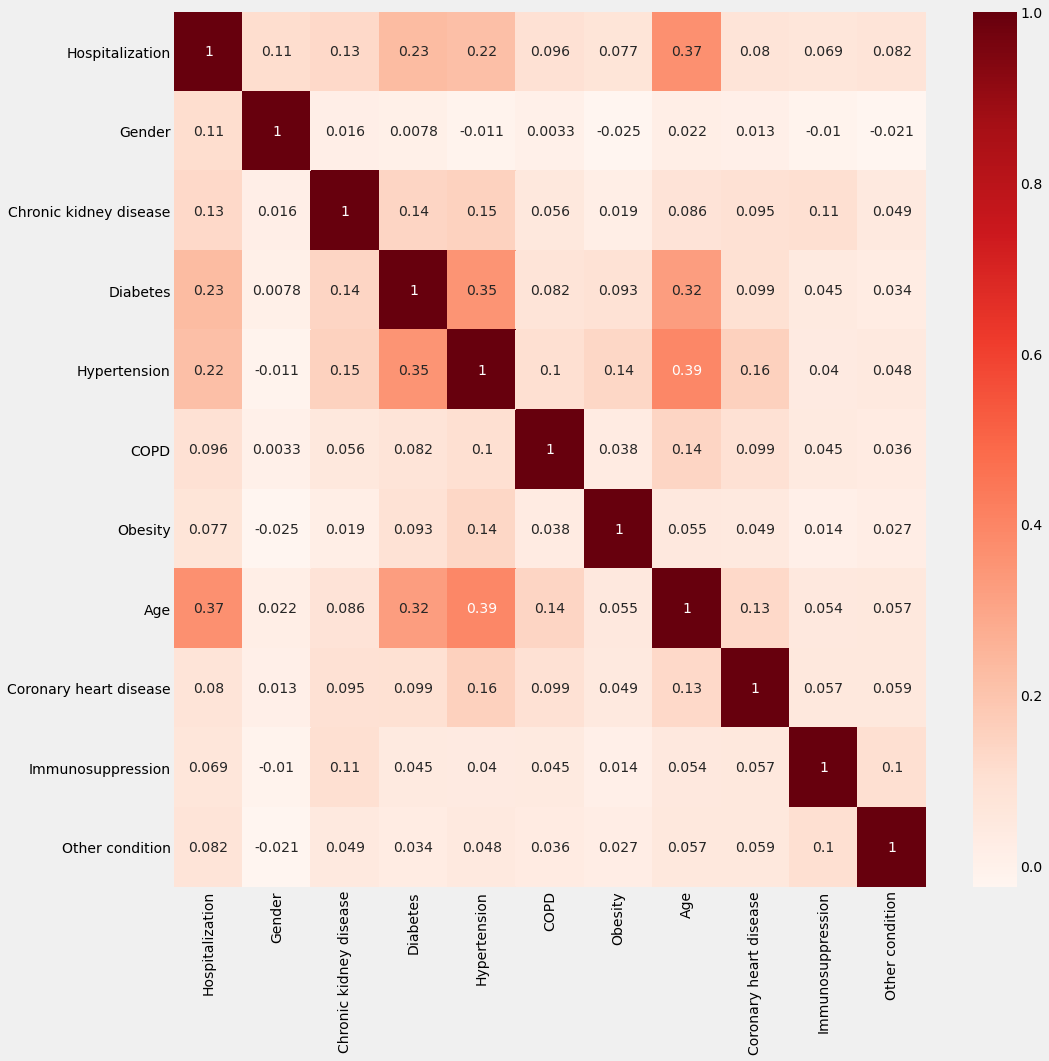

In [18]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = data_mexico_adults_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
#Correlation with output variable
cor_target = abs(cor["Hospitalization"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1].sort_values()
relevant_features

Gender                    0.113303
Chronic kidney disease    0.129384
Hypertension              0.215435
Diabetes                  0.227763
Age                       0.365408
Hospitalization           1.000000
Name: Hospitalization, dtype: float64

In [26]:
from pygam import LinearGAM, s, f
#load the breast cancer data set
import pygam

longitud_hosp = len(data_mexico_adults[data_mexico_adults.tipo_paciente == 1])

X_1 = data_mexico_adults[data_mexico_adults.tipo_paciente == 0].sample(longitud_hosp)
X_new = pd.concat([X_1, data_mexico_adults[data_mexico_adults.tipo_paciente == 1]])


X_new = X_new[["sexo","insuficiencia_renal_cronica","tipo_paciente","diabetes","hipertension","epoc","obesidad",
               "edad","enfermedad_cardiaca","inmunosupresivo","otra_condicion"]].dropna()


X = X_new.loc[:,X_new.columns !=
                        'tipo_paciente']._get_numeric_data()[["sexo","insuficiencia_renal_cronica",
                                                              "diabetes","hipertension","epoc","obesidad",
               "edad","enfermedad_cardiaca","inmunosupresivo","otra_condicion"]].dropna()

y = X_new["tipo_paciente"]
#Fit a model with the default parameters


gam = LogisticGAM(f(0) + f(1) + f(2) + f(3)+ f(4)+ f(5)+ s(6)+ f(7)+ f(8)+ f(9),max_iter=2000,n_splines=30,lam=0.8).fit(X, y)


print("Accuracy:" ,gam.accuracy(X, y))

gam.summary()


Accuracy: 0.7275036392264045
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     33.5203
Link Function:                        LogitLink Log Likelihood:                                -36813.3685
Number of Samples:                        67322 AIC:                                            73693.7776
                                                AICc:                                           73693.8141
                                                UBRE:                                                3.095
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2111
Feature 

NameError: name 'axs2' is not defined

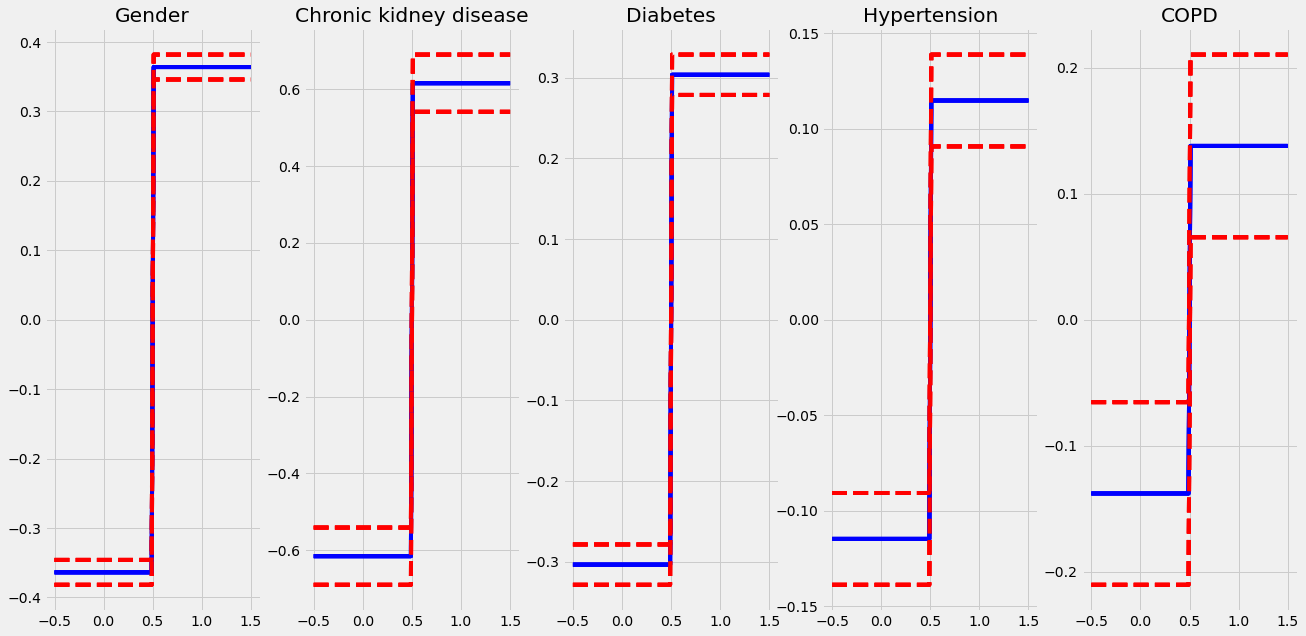

In [27]:
#X = X.to_numpy()

#y = y.to_numpy()

fig, axs = plt.subplots(1, 5,figsize=(20, 10))
#fig, axs2 = plt.subplots(1, 5,figsize=(20, 10))

titles = ["Gender","Chronic kidney disease","Diabetes","Hypertension","COPD","Obesity",
               "Age","Coronary heart disease","Immunosuppression","Other condition"]

for i in range(1, 5):
    for i, ax in enumerate(axs):
        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, width=.95)

        ax.plot(XX[:, i], pdep, c='b')
        ax.plot(XX[:, i], confi, c='r', ls='--')
        ax.set_title(titles[i]);

plt.savefig(r'C:\Users\Guillermo\Documents\TFM\TFM\TFM_Plantilla_Latex_es\figs\mex_adults_features1.png')


        
for i in range(1, 5):
    for i, ax in enumerate(axs2):
        XX = gam.generate_X_grid(term=i+5)
        pdep, confi = gam.partial_dependence(term=i+5, width=.95)

        ax.plot(XX[:, i+5], pdep, c='b')
        ax.plot(XX[:, i+5], confi, c='r', ls='--')
        ax.set_title(titles[i+5]);

plt.savefig(r'C:\Users\Guillermo\Documents\TFM\TFM\TFM_Plantilla_Latex_es\figs\mex_adults_features2.png')


## CHILDREN ANALYSIS


In [28]:
#Como nos interesan los factores de riesgo y no los sintomas, selecionamos un subconjunto de los datos

data_mexico_ped = data_mexico_ped[["tipo_paciente","sexo","edad","unidad_cuidados_intensivos",
"diabetes","epoc","asma","inmunosupresivo",
"hipertension","VIH_SIDA","otra_condicion",
"enfermedad_cardiaca","obesidad",
"insuficiencia_renal_cronica","tabaquismo"]]

data_mexico_ped_corr = data_mexico_ped.rename(columns={"tipo_paciente": "Hospitalization",
                                                             "sexo": "Gender",
                                                            "insuficiencia_renal_cronica": "Chronic kidney disease",
                                                            "diabetes": "Diabetes",
                                                            "hipertension": "Hypertension",
                                                            "epoc": "COPD",
                                                            "obesidad": "Obesity",
                                                            "edad": "Age",
                                                            "enfermedad_cardiaca": "Coronary heart disease",
                                                            "inmunosupresivo": "Immunosuppression",
                                                            "otra_condicion": "Other condition"})

data_mexico_ped_corr = data_mexico_ped_corr[["Hospitalization","Gender","Chronic kidney disease","Diabetes","Hypertension","COPD","Obesity",
               "Age","Coronary heart disease","Immunosuppression","Other condition"]]

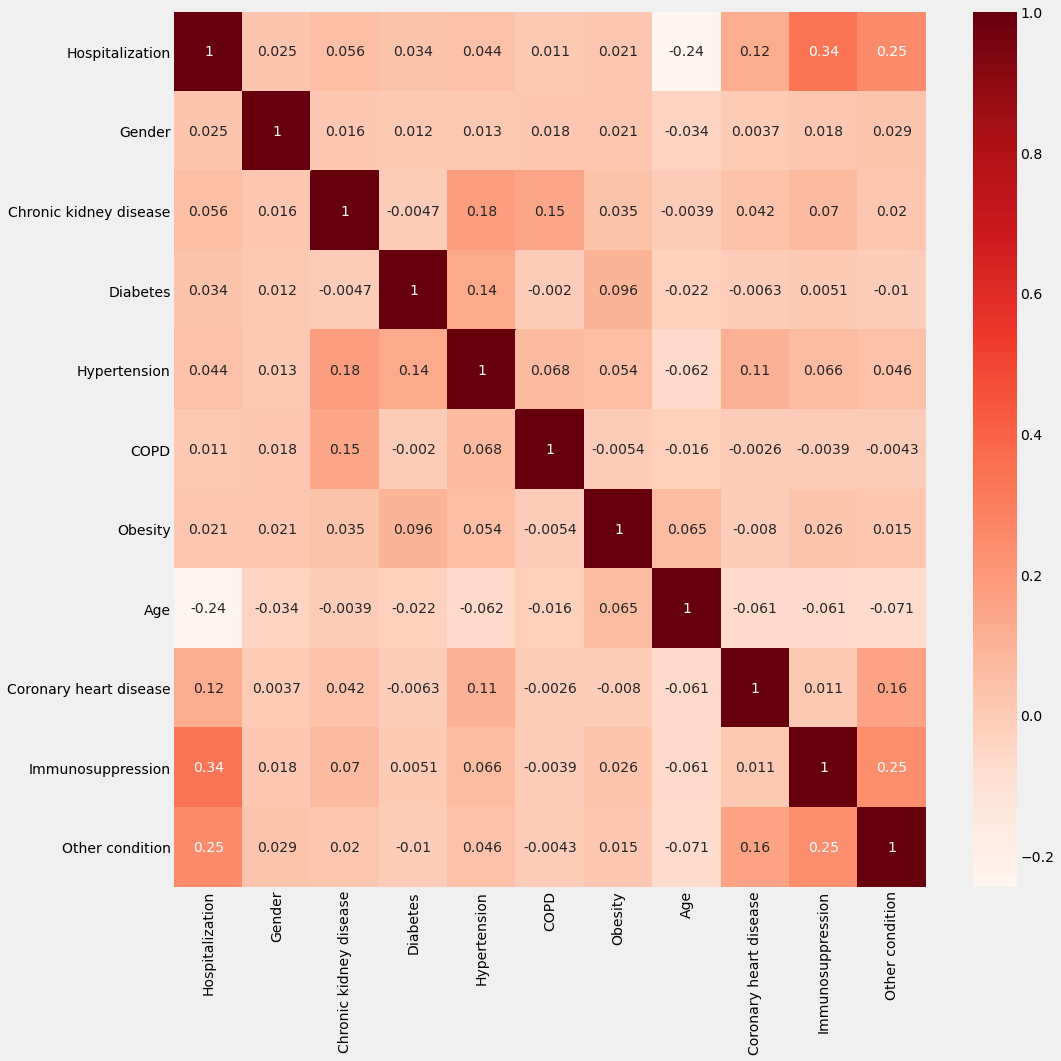

In [29]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = data_mexico_ped_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
#Correlation with output variable
cor_target = abs(cor["Hospitalization"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1].sort_values()
relevant_features

Coronary heart disease    0.122274
Age                       0.244132
Other condition           0.248993
Immunosuppression         0.335835
Hospitalization           1.000000
Name: Hospitalization, dtype: float64

In [32]:

longitud_hosp = len(data_mexico_ped[data_mexico_ped.tipo_paciente == 1])

X_1 = data_mexico_ped[data_mexico_ped.tipo_paciente == 0].sample(longitud_hosp)
X_new = pd.concat([X_1, data_mexico_ped[data_mexico_ped.tipo_paciente == 1]])

X_new = X_new[["sexo","insuficiencia_renal_cronica","tipo_paciente","diabetes","hipertension","epoc","obesidad",
               "edad","enfermedad_cardiaca","inmunosupresivo","otra_condicion"]].dropna()


X = X_new.loc[:,X_new.columns !=
                        'tipo_paciente']._get_numeric_data()[["sexo","insuficiencia_renal_cronica",
                                                              "diabetes","hipertension","epoc","obesidad",
               "edad","enfermedad_cardiaca","inmunosupresivo","otra_condicion"]].dropna()

y = X_new["tipo_paciente"]

#Fit a model with the default parameters
#gam = LogisticGAM(max_iter=50,n_splines=60,lam=1).fit(X, y)

gam = LogisticGAM(f(0) + f(1) + f(2) + f(3)+ f(4)+ f(5)+ s(6)+ f(7)+ f(8)+ f(9),max_iter=50,n_splines=30,lam=0.8).fit(X, y)


print("Accuracy:" ,gam.accuracy(X, y))

gam.summary()


Accuracy: 0.7844488188976378
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     20.3836
Link Function:                        LogitLink Log Likelihood:                                  -481.1394
Number of Samples:                         1016 AIC:                                              1003.046
                                                AICc:                                            1004.0094
                                                UBRE:                                               3.0033
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3168
Feature 

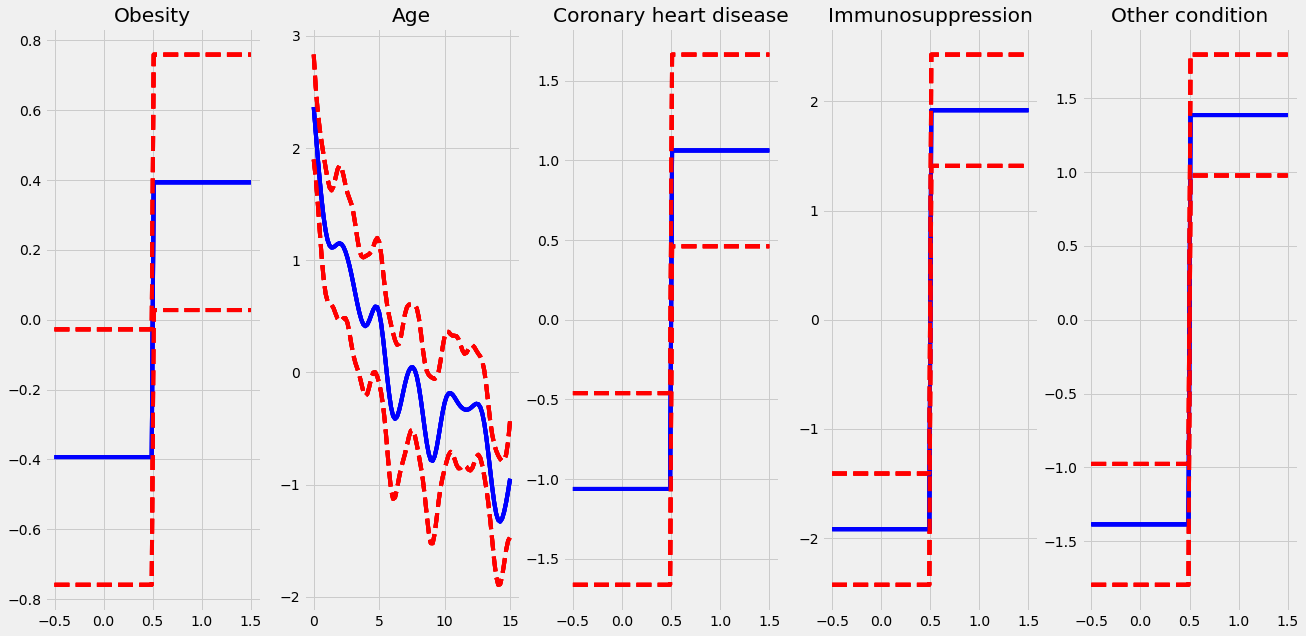

In [50]:
from pygam import LogisticGAM, s, f
from pygam.datasets import default


#X = X.to_numpy()

#y = y.to_numpy()

#fig, axs = plt.subplots(1, 5,figsize=(20, 10))
fig, axs2 = plt.subplots(1, 5,figsize=(20, 10))

titles = ["Gender","Chronic kidney disease","Diabetes","Hypertension","COPD","Obesity",
               "Age","Coronary heart disease","Immunosuppression","Other condition"]



for i in range(1, 5):
    for i, ax in enumerate(axs):
        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, width=.95)

        ax.plot(XX[:, i], pdep, c='b')
        ax.plot(XX[:, i], confi, c='r', ls='--')
        ax.set_title(titles[i]);

plt.savefig(r'C:\Users\Guillermo\Documents\TFM\TFM\TFM_Plantilla_Latex_es\figs\mex_children_features1.png')


        
for i in range(1, 5):
    for i, ax in enumerate(axs2):
        XX = gam.generate_X_grid(term=i+5)
        pdep, confi = gam.partial_dependence(term=i+5, width=.95)

        ax.plot(XX[:, i+5], pdep, c='b')
        ax.plot(XX[:, i+5], confi, c='r', ls='--')
        ax.set_title(titles[i+5]);

plt.savefig(r'C:\Users\Guillermo\Documents\TFM\TFM\TFM_Plantilla_Latex_es\figs\mex_children_features2.png')


## APLICACION A LOS DATOS DEL SJD

Vamos a hacer un modelo sólo con las varibales estadisticamente significativas.

In [33]:

longitud_hosp = len(data_mexico_ped[data_mexico_ped.tipo_paciente == 1])

X_1 = data_mexico_ped[data_mexico_ped.tipo_paciente == 0].sample(longitud_hosp)
X_new = pd.concat([X_1, data_mexico_ped[data_mexico_ped.tipo_paciente == 1]])

X_new = X_new[["sexo","tipo_paciente","hipertension","obesidad",
               "edad","enfermedad_cardiaca","inmunosupresivo","otra_condicion"]].dropna()



X = X_new.loc[:,X_new.columns !=
                        'tipo_paciente']._get_numeric_data()[["sexo","hipertension","obesidad",
               "edad","enfermedad_cardiaca","inmunosupresivo","otra_condicion"]].dropna()

y = X_new["tipo_paciente"]

#Fit a model with the default parameters
gam = LogisticGAM().fit(X, y)

print("Accuracy:" ,gam.accuracy(X, y))

gam.summary()



Accuracy: 0.7746062992125984
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     16.8674
Link Function:                        LogitLink Log Likelihood:                                  -507.2372
Number of Samples:                         1016 AIC:                                             1048.2093
                                                AICc:                                            1048.8855
                                                UBRE:                                                3.045
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2797
Feature 

In [34]:
data_hospitalizacion = pd.read_csv(r"C:\Users\Guillermo\Documents\TFM\TFM\Datos\COVIDHospitalitzaci_DATA_2020-09-29_anonimcsv.csv",
                                     sep= ";", encoding = 'ANSI')

data_hospitalizacion = data_hospitalizacion[[
'dataingres_domicili',
'dataalta_domicili',
'casocontrol',
'cas',
'controlped',
'data_enquesta',
'dn_estudi',
'entrevista',
'quirespon',
'quinapersona',
'consentiment',
'dades_de_filiacio_i_contacte_complete',
'genere',
'etnia',
'tipus_etnia',
'pes',
'talla',
'antecedents',
'tipus_antecedents___1',
'tipus_antecedents___2',
'tipus_antecedents___3',
'tipus_antecedents___5',
'tipus_antecedents___6',
'tipus_antecedents___7',
'tipus_antecedents___8',
'tipus_antecedents___9',
'tipus_antecedents___10',
'antecedent_respi',
'antecedent_cv___1',
'antecedent_cv___2',
'antecedent_cv___3',
'antecedent_cv___4',
'trhta',
'farmachta',
'antec_onco',
'trdiabetis',
'tipus_toxics___1',
'tipus_toxics___2',
'tipus_toxics___3',
'tipus_toxics___4',
'cigarrets_dia',
'ube_setmana',
'fi_tabaquisme',
'ingres_ultimany',
'malalt_3m',
'urgencies_3m',
'infeccio_respiratoria',
'data_infecciorespi',
'tipus_infecciorespi',
'altres_respi',
'infeccio_gastro',
'data_infecciogastro',
'itu_recent',
'lesions_cutanies',
'tipus_lesionscutanies',
'apendicitis',
'data_apendicitis',
'infeccio_invasiva',
'tipus_infeccioinvasiva___1',
'tipus_infeccioinvasiva___2',
'tipus_infeccioinvasiva___3',
'tipus_infeccioinvasiva___4',
'tipus_infeccioinvasiva___5',
'tipus_infeccioinvasiva___6',
'pacient_immuno',
'ingres_hospital',
'data_ingreshsjd',
'motiu_ingres',
'dades_demografiques_complete',
'farmacs_3m',
'tipus_farmacs___1',
'tipus_farmacs___2',
'tipus_farmacs___3',
'tipus_farmacs___4',
'tipus_farmacs___5',
'tipus_farmacs___6',
'tipus_farmacs___7',
'tipus_farmacs___8',
'tipus_farmacs___9',
'tipus_farmacs___11',
'tipus_farmacs___10',
'altres_farmacs',
'quins_antibiotics___1',
'quins_antibiotics___2',
'quins_antibiotics___3',
'quins_antibiotics___4',
'quins_antibiotics___5',
'quins_antibiotics___6',
'quins_antibiotics___7',
'quins_antibiotics___8',
'altres_atb',
'data_iniciatb',
'data_fiatb',
'motiu_prendreatb',
'quin_antiviral',
'indicacio_antiviral',
'dies_cloroquina',
'vacunesembaras___1',
'vacunesembaras___2',
'pes_neixer',
'talla_neixer',
'sg',
'pc_neixer',
'tipus_part',
'profilaxiatbpart',
'quins_atbpart',
'motiu_atbpart',
'lloc_part',
'lm',
'hafinalitzatlm',
'mesos_lm',
'fi_lm',
'lartificial',
'data_inicila',
'vacunes_correctes',
'font_vacunes',
'control_vacunes',
'vacunes_administrades___1',
'vacunes_administrades___2',
'vacunes_administrades___3',
'vacunes_administrades___4',
'vacunes_administrades___5',
'vacunes_administrades___6',
'vacunes_administrades___7',
'vacunes_administrades___8',
'pneumo1',
'data_pneumo1',
'pneumo2',
'data_pneumo2',
'pneumo3',
'data_pneumo3',
'data_hexa1',
'data_hexa2',
'data_hexa3',
'meningo1___1',
'meningo1___2',
'meningo1___3',
'data_meningo1',
'meningo2___1',
'meningo2___2',
'meningo2___3',
'data_meningo2',
'meningo3___1',
'meningo3___2',
'meningo3___3',
'data_meningo3',
'data_vha',
'data_triplevirica1',
'data_triplevirica2',
'data_triplevirica3',
'data_varicela1',
'data_varicela2',
'data_rotavirus1',
'data_rotavirus2',
'data_rotavirus3',
'data_vacunagrip',
'antecedents_perinatologics_farmacs_vacunes_complete','ingres_uci',
'resultat_pcrcovid']]

#Eliminar columnas con todo nulos constantes
data_hospitalizacion = data_hospitalizacion.dropna(axis=1, how='all')

#Eliminar columnas constantes
data_hospitalizacion = data_hospitalizacion.loc[:, (data_hospitalizacion != data_hospitalizacion.iloc[0]).any()] 

data_hospitalizacion = data_hospitalizacion[data_hospitalizacion['dn_estudi'].notna()]


data_hospitalizacion["edad"] = (pd.to_datetime(datetime.date.today()) - 
pd.to_datetime(data_hospitalizacion["dn_estudi"], format="%d/%m/%Y") ) / np.timedelta64(1,'Y') 

data_hospitalizacion.loc[data_hospitalizacion['edad'] <= 10, "EDAD_CAT"] = "CHILD"
data_hospitalizacion.loc[(data_hospitalizacion['edad'] > 10) &
                         (data_hospitalizacion['edad'] <= 18), "EDAD_CAT"] = "ADOLESCET"
data_hospitalizacion.loc[data_hospitalizacion['edad'] > 18, "EDAD_CAT"] = "ADULT"

data_hospitalizacion.loc[data_hospitalizacion['ingres_uci'].isna(), "ingres_uci"] = 2

data_hospitalizacion.loc[data_hospitalizacion['ingres_hospital'].isna(), "ingres_hospital"] = 2


In [35]:

data_hospitalizacion = data_hospitalizacion[((data_hospitalizacion["ingres_hospital"] == 1) |
                                             (data_hospitalizacion["resultat_pcrcovid"] == 1)) &
                                            (data_hospitalizacion["edad"] <= 15)]


data_hospitalizacion["tipus_antecedents___10"] = data_hospitalizacion["tipus_antecedents___1"] + data_hospitalizacion["tipus_antecedents___10"] + data_hospitalizacion["tipus_antecedents___3"] + data_hospitalizacion["tipus_antecedents___5"] + data_hospitalizacion["tipus_antecedents___6"] + data_hospitalizacion["tipus_antecedents___7"] + data_hospitalizacion["tipus_antecedents___9"] 

data_hospitalizacion.loc[data_hospitalizacion['tipus_antecedents___10'] >= 1, "tipus_antecedents___10"] = 1


X = data_hospitalizacion[['tipus_antecedents___2',
                                             'edad','tipus_antecedents___8','tipus_antecedents___10']]

y = data_hospitalizacion[["ingres_hospital"]].rename(columns={"ingres_hospital": "tipo_paciente"})

X = X.rename(columns={
                                     "tipus_antecedents___2": "enfermedad_cardiaca",
                                    "tipus_antecedents___8": "inmunosupresivo",
                                    "tipus_antecedents___10": "otra_condicion"})

X['edad'] = np.floor(X['edad'])

X 

,enfermedad_cardiaca,edad,inmunosupresivo,otra_condicion
19,1,12.0,0,1
22,0,7.0,1,0
26,0,3.0,0,0
27,0,3.0,0,0
30,0,13.0,0,0
52,1,14.0,0,0
54,0,0.0,0,0
55,0,0.0,0,0
56,0,0.0,0,0
57,0,2.0,0,0


In [36]:


data_hospitalizacion = data_hospitalizacion[((data_hospitalizacion["ingres_hospital"] == 1) |
                                             (data_hospitalizacion["resultat_pcrcovid"] == 1)) &
                                            (data_hospitalizacion["edad"] <= 15)]


data_hospitalizacion['genere'] = data_hospitalizacion['genere'].replace(2,0)


data_hospitalizacion["tipus_antecedents___10"] = data_hospitalizacion["tipus_antecedents___1"] + data_hospitalizacion["tipus_antecedents___10"] + data_hospitalizacion["tipus_antecedents___3"] + data_hospitalizacion["tipus_antecedents___5"] + data_hospitalizacion["tipus_antecedents___6"] + data_hospitalizacion["tipus_antecedents___7"] + data_hospitalizacion["tipus_antecedents___9"] 

data_hospitalizacion.loc[data_hospitalizacion['tipus_antecedents___10'] >= 1, "tipus_antecedents___10"] = 1


X = data_hospitalizacion[['genere','antecedent_cv___2','antecedent_cv___1',
                                             'edad','tipus_antecedents___2','tipus_antecedents___8','tipus_antecedents___10']]

y = data_hospitalizacion[["ingres_hospital"]].rename(columns={"ingres_hospital": "tipo_paciente"})

X = X.rename(columns={"genere": "gender",
                       "antecedent_cv___2": "hipertension",
                          "antecedent_cv___1" : "obesidad",
                        "tipus_antecedents___2": "enfermedad_cardiaca",
                        "tipus_antecedents___8": "inmunosupresivo",
                        "tipus_antecedents___10": "otra_condicion"})

X['edad'] = np.floor(X['edad'])

X 

,gender,hipertension,obesidad,edad,enfermedad_cardiaca,inmunosupresivo,otra_condicion
19,1.0,1,0,12.0,1,0,1
22,1.0,0,0,7.0,0,1,0
26,0.0,0,0,3.0,0,0,0
27,1.0,0,0,3.0,0,0,0
30,0.0,0,0,13.0,0,0,0
52,1.0,0,0,14.0,1,0,0
54,1.0,0,0,0.0,0,0,0
55,1.0,0,0,0.0,0,0,0
56,1.0,0,0,0.0,0,0,0
57,0.0,0,0,2.0,0,0,0


In [41]:

longitud_hosp = len(data_mexico_ped[data_mexico_ped.tipo_paciente == 1])

X_1 = data_mexico_ped[data_mexico_ped.tipo_paciente == 0].sample(longitud_hosp)
X_new = pd.concat([X_1, data_mexico_ped[data_mexico_ped.tipo_paciente == 1]])

X_new = X_new[["sexo","tipo_paciente","edad","enfermedad_cardiaca","otra_condicion"]].dropna()



X = X_new.loc[:,X_new.columns !=
                        'tipo_paciente']._get_numeric_data()[["sexo","edad","enfermedad_cardiaca","otra_condicion"]].dropna()

y = X_new["tipo_paciente"]

#Fit a model with the default parameters
gam = LogisticGAM(f(0) + s(1) + f(2) + f(3),max_iter=50,n_splines=30,lam=0.1).fit(X, y)

print("Accuracy:" ,gam.accuracy(X, y))

gam.summary()



Accuracy: 0.7312992125984252
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     18.5344
Link Function:                        LogitLink Log Likelihood:                                  -545.9503
Number of Samples:                         1016 AIC:                                             1128.9694
                                                AICc:                                            1129.7753
                                                UBRE:                                               3.1258
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2248
Feature 

In [42]:
data_hospitalizacion = pd.read_excel(r"C:\Users\Guillermo\Documents\TFM\TFM\Datos\excelinterferoncitoquines_2511.xlsx")


data_hospitalizacion["edad"] = (pd.to_datetime(datetime.date.today()) - 
pd.to_datetime(data_hospitalizacion["Data_naixement"], format="%d/%m/%Y") ) / np.timedelta64(1,'Y') 

data_hospitalizacion = data_hospitalizacion[data_hospitalizacion["edad"] <= 15]


data_hospitalizacion = data_hospitalizacion[["genere","edad","ant_CV","antecedents","ingres_hospital"]].dropna()

y = data_hospitalizacion['ingres_hospital']
y = y.replace("no",0)
y = y.replace("si",1)

data_hospitalizacion = data_hospitalizacion[["genere","edad","ant_CV","antecedents"]]


data_hospitalizacion['edad'] = np.floor(data_hospitalizacion['edad'])

data_hospitalizacion['ant_CV'] = data_hospitalizacion['ant_CV'].replace("no",0)
data_hospitalizacion['ant_CV'] = data_hospitalizacion['ant_CV'].replace("si",1)
data_hospitalizacion['antecedents'] = data_hospitalizacion['antecedents'].replace("no",0)
data_hospitalizacion['antecedents'] = data_hospitalizacion['antecedents'].replace("si",1)
data_hospitalizacion['genere'] = data_hospitalizacion['genere'].replace("dona",0)
data_hospitalizacion['genere'] = data_hospitalizacion['genere'].replace("home",1)

X = data_hospitalizacion.dropna()


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
predictions = gam.predict(X)
print("Accuracy: {} ".format(accuracy_score(y, predictions)))
probas = gam.predict_proba(X)      
print("Log Loss: {} ".format(log_loss(y, probas)))

Accuracy: 0.6666666666666666 
Log Loss: 0.7202677463169435 


In [44]:
X

,genere,edad,ant_CV,antecedents
1,0,13.0,0,0
2,0,3.0,0,0
5,0,0.0,0,0
6,0,2.0,0,0
7,0,12.0,0,0
8,1,8.0,0,0
9,1,0.0,0,0
10,1,8.0,0,0
11,1,10.0,0,0
12,1,7.0,0,0


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix(y, predictions)


array([[9, 5],
       [3, 7]], dtype=int64)

## UCI

In [58]:
#https://github.com/carranco-sga/Mexico-COVID-19/blob/master/SINAVE_CDMX/2020/10/20201025.zip
data_mexico = pd.read_csv(r"C:\Users\Guillermo\Documents\TFM\TFM\Datos\Mexico\20201025\CDMX_SINAVE.csv",encoding = 'ANSI')


In [59]:
data_mexico_ped = data_mexico[data_mexico.rango_de_edad.isin(["06-15","0-05"])]

In [60]:
data_mexico_ped = data_mexico_ped.replace(['NO'],0)
data_mexico_ped = data_mexico_ped.replace(['SI'],1)
data_mexico_ped = data_mexico_ped.replace(['SE IGNORA'],0)
data_mexico_ped['tipo_paciente'] = data_mexico_ped['tipo_paciente'].replace(['AMBULATORIO'],0)
data_mexico_ped['tipo_paciente'] = data_mexico_ped['tipo_paciente'].replace(['HOSPITALIZADO'],1)
data_mexico_ped['sexo'] = data_mexico_ped['sexo'].replace(['FEMENINO'],0)
data_mexico_ped['sexo'] = data_mexico_ped['sexo'].replace(['MASCULINO'],1)
data_mexico_ped = data_mexico_ped[data_mexico_ped["resultado_definitivo"] == "SARS-CoV-2"]
#data_mexico_ped = data_mexico_ped[data_mexico_ped["unidad_cuidados_intensivos"].notna()]
data_mexico_ped = data_mexico_ped[data_mexico_ped["tipo_paciente"] == 1]

data_mexico_ped.unidad_cuidados_intensivos = data_mexico_ped.unidad_cuidados_intensivos.fillna(0)

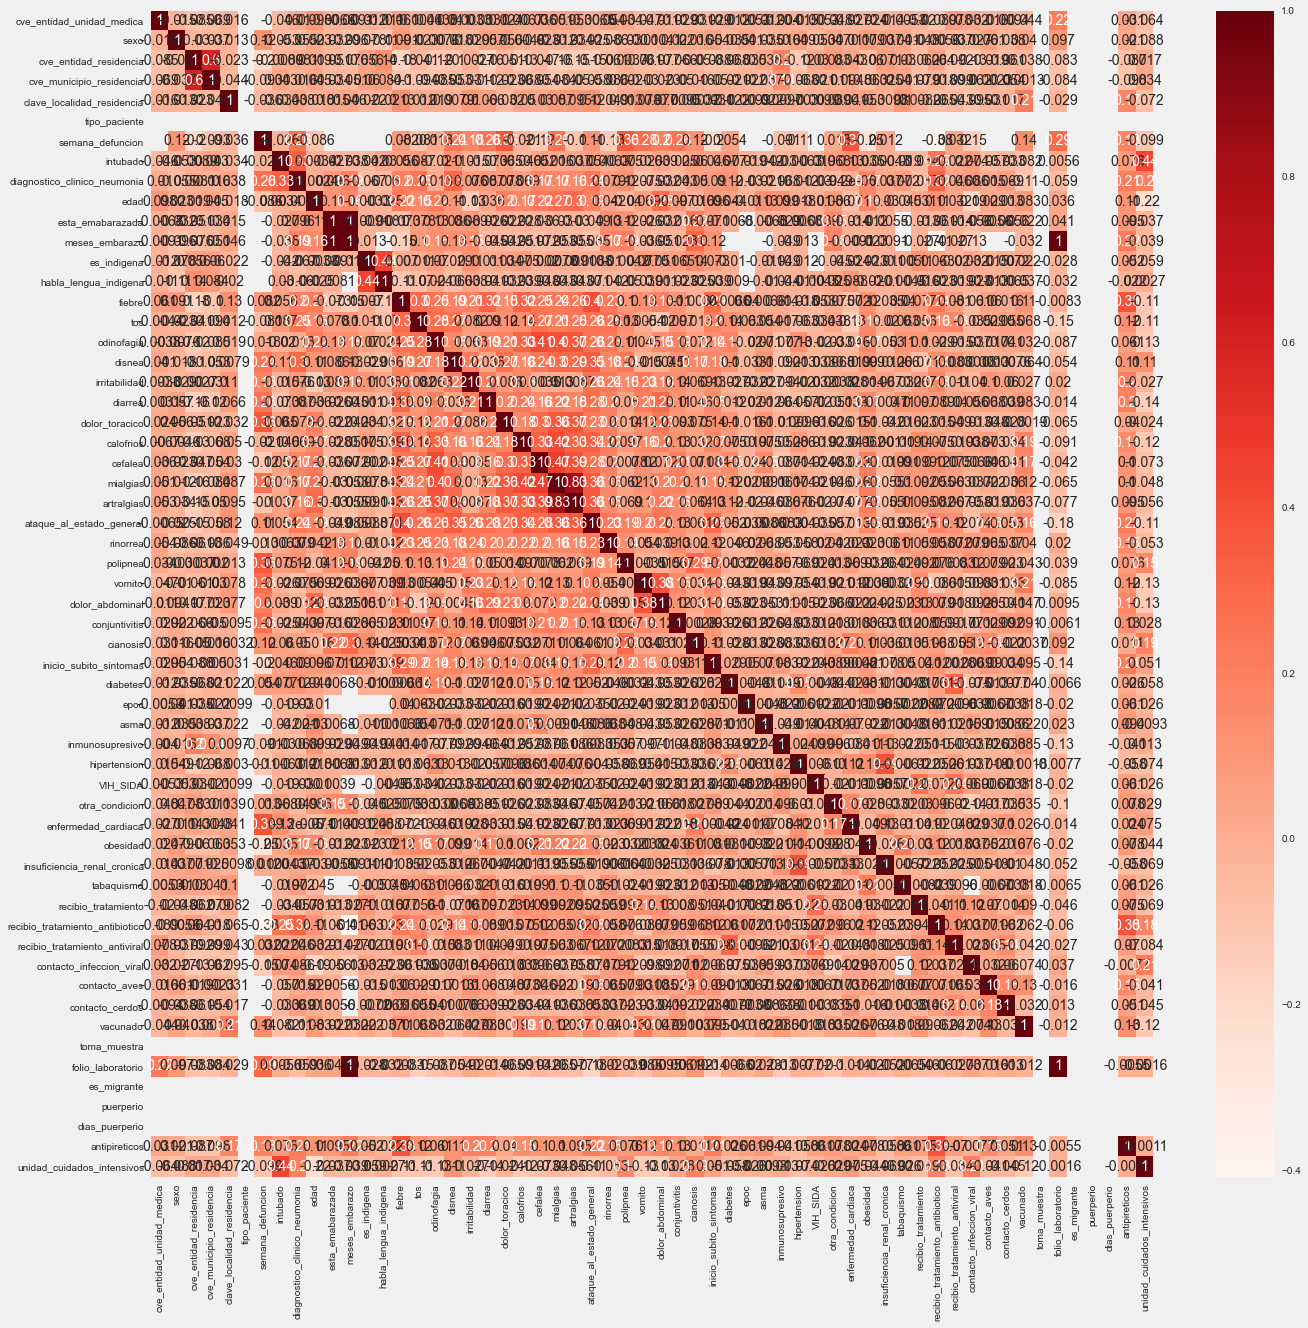

In [61]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = data_mexico_ped.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [62]:
#Correlation with output variable
cor_target = abs(cor["unidad_cuidados_intensivos"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
relevant_features

intubado                           0.437471
diagnostico_clinico_neumonia       0.195085
edad                               0.222572
fiebre                             0.113132
tos                                0.106163
odinofagia                         0.127534
disnea                             0.110497
diarrea                            0.143980
calofrios                          0.116975
ataque_al_estado_general           0.105098
polipnea                           0.152942
vomito                             0.128634
dolor_abdominal                    0.132906
cianosis                           0.186804
recibio_tratamiento_antibiotico    0.181948
contacto_infeccion_viral           0.212604
vacunado                           0.124732
unidad_cuidados_intensivos         1.000000
Name: unidad_cuidados_intensivos, dtype: float64

In [64]:
from pygam import LogisticGAM
#load the breast cancer data set
import pygam

longitud_hosp = len(data_mexico_ped[data_mexico_ped.unidad_cuidados_intensivos == 1])

X_1 = data_mexico_ped[data_mexico_ped.unidad_cuidados_intensivos == 0].sample(longitud_hosp)
#X_new = pd.concat([X_1, data_mexico_ped[data_mexico_ped.unidad_cuidados_intensivos == 1]])

#X_new = X_new[['unidad_cuidados_intensivos',"vacunado","enfermedad_cardiaca"
 #                                                             ,"edad","inmunosupresivo",
  #                                                            "otra_condicion"]].dropna()



data_mexico_ped["gastrointestinal"] = 0


data_mexico_ped.loc[(data_mexico_ped['vomito'] == 1) |
                         (data_mexico_ped['diarrea'] ==1), "gastrointestinal"] = 1

X_new = data_mexico_ped[["unidad_cuidados_intensivos","edad","cianosis","polipnea"]].dropna()


X = X_new.loc[:,X_new.columns !=
                        'unidad_cuidados_intensivos']._get_numeric_data()[["edad","cianosis","polipnea"]].dropna()

y = X_new["unidad_cuidados_intensivos"]
#Fit a model with the default parameters
gam = LogisticGAM(max_iter=50,n_splines=60,lam=1).fit(X, y)

print("Accuracy:" ,gam.accuracy(X, y))

gam.summary()


Accuracy: 0.7918454935622318
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     16.4673
Link Function:                        LogitLink Log Likelihood:                                    -214.95
Number of Samples:                          466 AIC:                                              462.8346
                                                AICc:                                             464.2761
                                                UBRE:                                               3.0215
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1598
Feature 

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


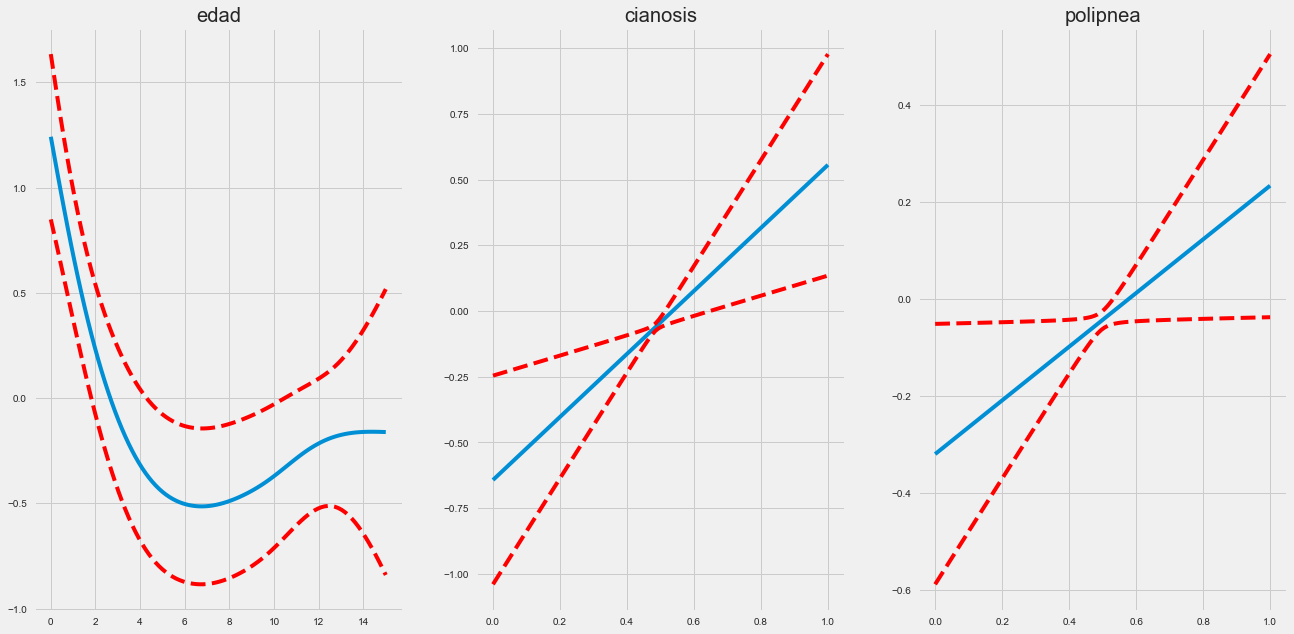

In [67]:
from pygam import LogisticGAM, s, f
from pygam.datasets import default


X = X_new.loc[:,X_new.columns !=
                        'unidad_cuidados_intensivos']._get_numeric_data()[["edad","cianosis","polipnea"]].dropna().to_numpy()

y = X_new["unidad_cuidados_intensivos"].to_numpy()

gam = LogisticGAM().gridsearch(X, y)


fig, axs = plt.subplots(1, 3,figsize=(20, 10))

titles = ["edad","cianosis","polipnea"]

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);
